# Optimizing Print Bed Temperature Distribution 

#### Introduction

The aerospace manufactoring company utilizes advanced additive manufacturing techniques, specifically wire arc DED, for the production of critical aerospace components. A recurrent challenge in this process is the warping and distortion of parts due to uneven heat distribution and buildup during the metal deposition process. This can significantly affect the structural integrity and dimensional accuracy of the printed components.

#### Problem Statement

During the wire arc DED process, the company faces issues where the deposited metal aluminum wire, upon melting and solidifying, undergoes warping and distortion. This is largely attributed to the uneven heat buildup across the print bed, resulting in differential cooling rates and subsequent thermal stress within the material.

#### Proposed Solution

The proposed solution involves the development and implementation of a reverse solver algorithm. This computational strategy aims to model the expected warping and distortion based on the thermal history of the deposition process. By understanding these distortions in advance, it becomes possible to adjust the printing parameters to "pre-correct" the shape, ensuring that the final product adheres to the desired specifications.

#### Data Simulation

For the initial phase, simulated data representing the warping and distortion effects in printed components will be generated. This data will mimic the real-world outcomes observed in the company's manufacturing process, accounting for variables such as temperature, print speed, layer height, and material feed rate.


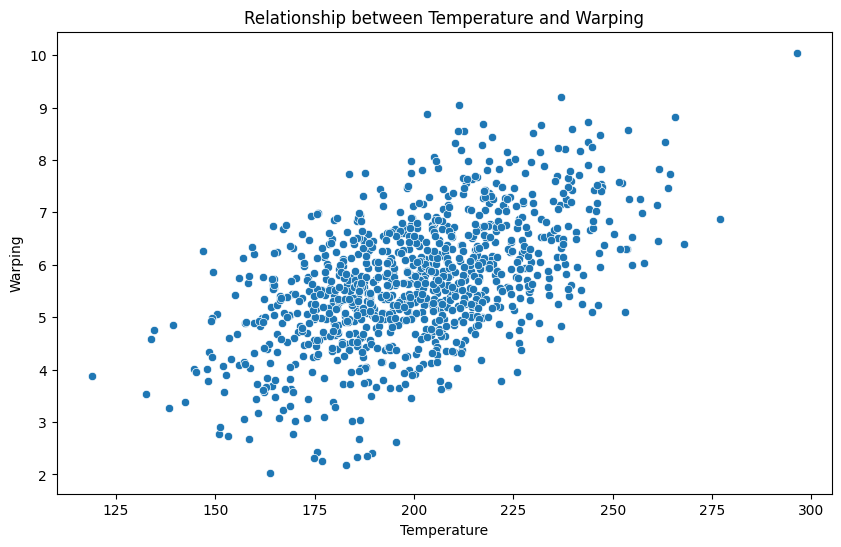

In [14]:
# Simulate dataset for demonstration purposes
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic dataset
temperature_data = np.random.normal(loc=200, scale=25, size=1000)  # Generate temperature
temp_gradients = np.gradient(temperature_data, edge_order=1)  # Synthetic temperature gradients
warping_data = np.random.normal(loc=0, scale=1, size=1000) + temperature_data * 0.028  # Warping increases with temperature
print_speed_data = np.random.normal(loc=50, scale=5, size=1000)  # Generate print speed
layer_height_data = np.random.uniform(low=0.1, high=0.3, size=1000)  # Generate layer height
material_feed_rate_data = np.random.normal(loc=25, scale=2, size=1000)  # Generate feed rate

# Combine into a DataFrame
df = pd.DataFrame({
    'Temperature': temperature_data,
    'Temp_Gradients': temp_gradients,
    'Warping': warping_data,
    'Print_Speed': print_speed_data,
    'Layer_Height': layer_height_data,
    'Material_Feed_Rate': material_feed_rate_data
})

# Plot Wrapping and Temperature Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Warping', data=df)
plt.title('Relationship between Temperature and Warping')
plt.xlabel('Temperature')
plt.ylabel('Warping')
plt.show()

In [15]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature and target arrays
features = df[['Temperature', 'Print_Speed', 'Layer_Height', 'Material_Feed_Rate']].values
temp_gradients = df['Temp_Gradients'].values.reshape(-1, 1)
target = df['Warping'].values.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test, grad_train, grad_test = train_test_split(features_scaled, target, temp_gradients, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
grad_train_tensor = torch.tensor(grad_train, dtype=torch.float32)
grad_test_tensor = torch.tensor(grad_test, dtype=torch.float32)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor, grad_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor, grad_test_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

#### Hypothetical Physics-based Constraint for Warping

In metal 3D printing, warping is a common issue where parts deform, typically due to uneven cooling and the resultant thermal stress. A simplified physics-based constraint for this phenomenon can be based on the understanding that warping is influenced by the temperature gradient across the print material.A temperature gradient refers to the rate of temperature change over a certain distance within a material or between different materials.

#### Mathematical Representation

Let's denote the warping deformation by $W$, which we aim to minimize. A simple way to conceptualize the influence of temperature on warping is to assume that warping is directly proportional to the temperature gradient ($\nabla T$) across the print bed. This can be represented as:

$$W \propto |\nabla T|$$

where:

- $W$ is the warping deformation.
- $\nabla T$ is the temperature gradient across the material, which can be computed as the spatial derivative of temperature.

In a discrete setting, if $T$ represents the temperature distribution across the print bed (or within the material), then the temperature gradient can be approximated using finite differences or other numerical differentiation techniques.

#### Incorporating Physics-based Constraint into ML Models

To incorporate this physics-based constraint into the training of machine learning models, we adjust the loss function to include a term that penalizes high temperature gradients, as these are hypothesized to cause warping.

#### Model Initialization

First, we define two simple neural network models in PyTorch:

In [16]:
import torch
import torch.nn as nn

# Simple MLP Model
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 64),  # 4 input features: temp, speed, height, feed rate
            nn.ReLU(),
            nn.Linear(64, 1) # Output: warping prediction
        )
        
    def forward(self, x):
        return self.layers(x)

# # Deeper MLP Model
# class DeeperMLP(nn.Module):
#     def __init__(self):
#         super(DeeperMLP, self).__init__()
#         self.layers = nn.Sequential(
#             nn.Linear(4, 128),
#             nn.ReLU(),
#             nn.Linear(128, 64),
#             nn.ReLU(),
#             nn.Linear(64, 1)
#         )
        
#     def forward(self, x):
#         return self.layers(x)

#### Loss Function and Optimizer
The custom loss function now includes a term for penalizing temperature gradients:

In [19]:
import torch
import torch.nn as nn

def custom_loss(output, target, temp_gradients, lambda_reg=0.01):
    criterion = nn.MSELoss()
    prediction_loss = criterion(output, target)
    physics_loss = torch.mean(temp_gradients ** 2)  # Penalizing high temperature gradients
    total_loss = prediction_loss + lambda_reg * physics_loss
    return total_loss

#### Training Process
Training involves iterating over epochs, calculating the custom loss for each batch, and updating the model parameters using backpropagation.

Epoch 1, Loss: 37.65544128417969
Epoch 2, Loss: 27.575942993164062
Epoch 3, Loss: 26.519786834716797
Epoch 4, Loss: 21.51063346862793
Epoch 5, Loss: 18.1994686126709
Epoch 6, Loss: 21.263315200805664
Epoch 7, Loss: 16.717557907104492
Epoch 8, Loss: 13.28395938873291
Epoch 9, Loss: 10.969924926757812
Epoch 10, Loss: 8.947782516479492
Epoch 11, Loss: 9.386209487915039
Epoch 12, Loss: 7.241815567016602
Epoch 13, Loss: 6.693471908569336
Epoch 14, Loss: 6.1221418380737305
Epoch 15, Loss: 5.816315650939941
Epoch 16, Loss: 5.205377578735352
Epoch 17, Loss: 5.71901798248291
Epoch 18, Loss: 5.890543460845947
Epoch 19, Loss: 6.451478481292725
Epoch 20, Loss: 7.323227882385254
Epoch 21, Loss: 2.6475021839141846
Epoch 22, Loss: 5.052090644836426
Epoch 23, Loss: 5.234492301940918
Epoch 24, Loss: 3.878101348876953
Epoch 25, Loss: 5.495548248291016
Epoch 26, Loss: 2.6576218605041504
Epoch 27, Loss: 3.6960794925689697
Epoch 28, Loss: 6.633856773376465
Epoch 29, Loss: 4.619045257568359
Epoch 30, Loss: 

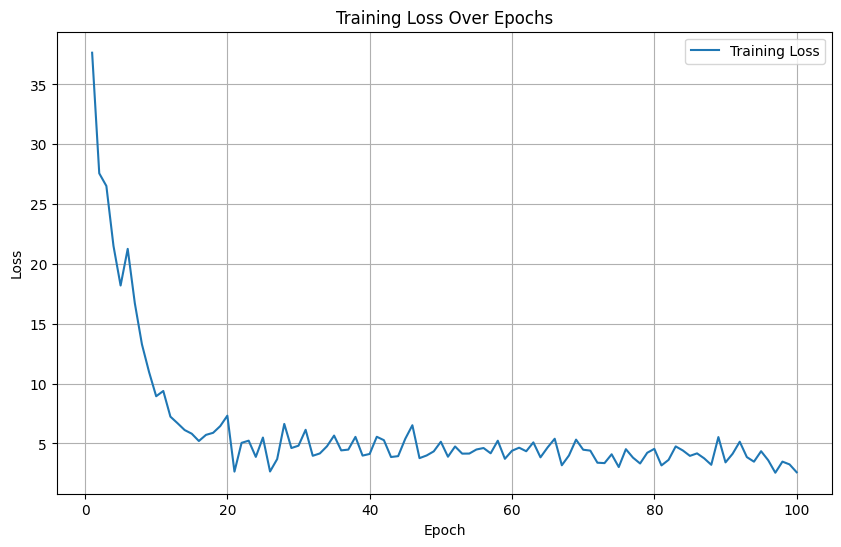

In [22]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

model = SimpleMLP()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
loss_values = []  # To store loss values
epochs = []  # To store epoch numbers

for epoch in range(num_epochs):
    for inputs, targets, gradients in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = custom_loss(outputs, targets, gradients, lambda_reg=0.01)
        loss.backward()
        optimizer.step()
    loss_values.append(loss.item())
    epochs.append(epoch+1)
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Visualization of the training loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


#### Epoch Output Interpretation

The training loss of the model consistently decreases from around 33.66 in the first epoch to approximately 3.67 by the 100th epoch, demonstrating the model's learning and improvement over time. Fluctuations in loss, particularly in early epochs, and eventual stabilization indicate the model's adjustment to data complexity and physics-informed constraints, with the optimizer fine-tuning parameters to minimize loss, reflecting an exploratory optimization process that moves towards convergence.

#### Model Evaluation
After training, evaluate the models on the test set, focusing on MSE and observing how well each model minimizes warping while adhering to physical constraints.

In [26]:
import torch

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Assuming test_loader is prepared similarly
    test_loss = sum(custom_loss(model(inputs), targets, gradients) for inputs, targets, gradients in test_loader) / len(test_loader)
    print(f"Test Loss: {test_loss}")

Test Loss: 4.361940383911133


#### Interpretation and Recommendation

The test loss of 4.361940383911133 from the model evaluation indicates that the physics-informed machine learning model has achieved a reasonable level of accuracy in predicting warping and distortion in the context of the wire arc Directed Energy Deposition (DED) process. This value represents the average difference between the model's predictions and the actual measured warping, as penalized by the custom loss function that includes both fidelity to the data and adherence to the physics-informed constraints.

A test loss in the vicinity of 4.36 suggests that while the model is not perfectly predicting every instance of warping and distortion, it has likely captured significant aspects of the underlying physical phenomena that contribute to these issues. This includes the model's ability to account for the effects of temperature gradients, print speed, layer height, and material feed rate on warping outcomes.

#### Recommendation and Next Step

1. Use model to adjust DED parameters, reducing warping risks.
2. Improve accuracy with more data and new variables.
3. Compare different models to find the best performer.
4. Integrate the best model for real-time operational guidance.
5. Continuously update the model with new manufacturing data.